In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

#%matplotlib inline
#%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

df_reg=pd.read_csv("df1.csv")

In [2]:
df_reg_kill=df_reg[['playdate','kill']]

In [3]:
df_reg_kill

,playdate,kill
0,2020-05-29 18:00:00,1
1,2020-05-29 18:23:00,2
2,2020-05-30 01:01:00,1
3,2020-05-30 01:28:00,0
4,2020-05-30 01:58:00,0
...,...,...
95,2020-06-03 20:36:00,0
96,2020-06-03 20:53:00,0
97,2020-06-03 20:54:00,0
98,2020-06-03 20:58:00,0


In [4]:
df_reg_kill.index=df_reg_kill['playdate']

In [5]:
df_reg_kill=df_reg_kill.drop('playdate',axis=1)

In [6]:
df_reg_kill

,kill
playdate,
2020-05-29 18:00:00,1
2020-05-29 18:23:00,2
2020-05-30 01:01:00,1
2020-05-30 01:28:00,0
2020-05-30 01:58:00,0
...,...
2020-06-03 20:36:00,0
2020-06-03 20:53:00,0
2020-06-03 20:54:00,0


In [7]:
df=df_reg_kill

In [8]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

80 20


In [9]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [10]:
time_steps = 1

# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.kill, time_steps)
X_test, y_test = create_dataset(test, test.kill, time_steps)

print(X_train.shape, y_train.shape)

(79, 1, 1) (79,)


In [11]:
X_train[0]

array([[1]])

In [12]:
y_train[0]

2

In [13]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

In [14]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Train on 71 samples, validate on 8 samples
Epoch 1/30
71/71 [==============================] - 2s 23ms/sample - loss: 3.1170 - val_loss: 1.7538
Epoch 2/30
71/71 [==============================] - 0s 474us/sample - loss: 3.0167 - val_loss: 1.6692
Epoch 3/30
71/71 [==============================] - 0s 367us/sample - loss: 2.9218 - val_loss: 1.5888
Epoch 4/30
71/71 [==============================] - 0s 548us/sample - loss: 2.8325 - val_loss: 1.5125
Epoch 5/30
71/71 [==============================] - 0s 618us/sample - loss: 2.7484 - val_loss: 1.4399
Epoch 6/30
71/71 [==============================] - 0s 472us/sample - loss: 2.6692 - val_loss: 1.3707
Epoch 7/30
71/71 [==============================] - 0s 595us/sample - loss: 2.5946 - val_loss: 1.3049
Epoch 8/30
71/71 [==============================] - 0s 557us/sample - loss: 2.5245 - val_loss: 1.2424
Epoch 9/30
71/71 [==============================] - 0s 668us/sample - loss: 2.4593 - val_loss: 1.1838
Epoch 10/30
71/71 [=====================

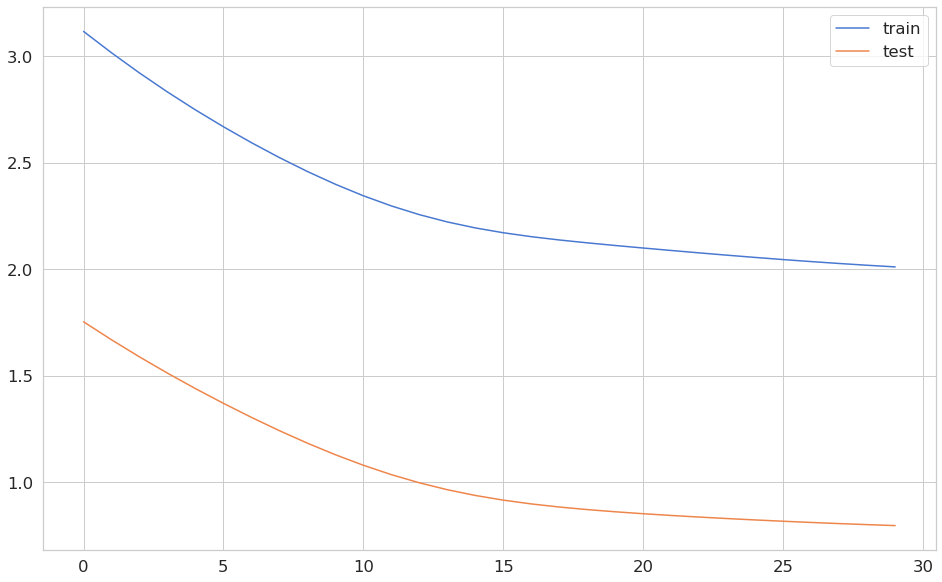

In [15]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [16]:
y_pred = model.predict(X_test)

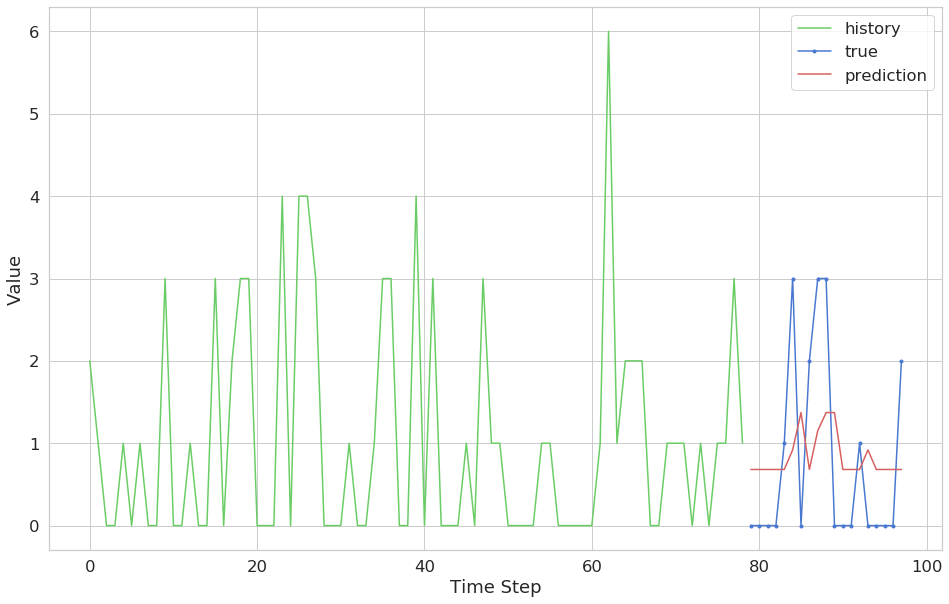

In [17]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [18]:
y_pred

array([[0.68125933],
       [0.68125933],
       [0.68125933],
       [0.68125933],
       [0.68125933],
       [0.918925  ],
       [1.3722006 ],
       [0.68125933],
       [1.1513404 ],
       [1.3722006 ],
       [1.3722006 ],
       [0.68125933],
       [0.68125933],
       [0.68125933],
       [0.918925  ],
       [0.68125933],
       [0.68125933],
       [0.68125933],
       [0.68125933]], dtype=float32)

In [19]:
y_test

array([0, 0, 0, 0, 1, 3, 0, 2, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 2])

In [20]:
reg_y_pred=y_pred

In [21]:
reg_y_test=y_test
reg_x_test=np.arange(len(y_train), len(y_train) + len(y_test))

16 4
(15, 1, 1) (15,)
Train on 13 samples, validate on 2 samples
Epoch 1/30
13/13 [==============================] - 0s 1ms/sample - loss: 23.1790 - val_loss: 7.3696
Epoch 2/30
13/13 [==============================] - 0s 1ms/sample - loss: 23.0406 - val_loss: 7.3055
Epoch 3/30
13/13 [==============================] - 0s 1ms/sample - loss: 22.8334 - val_loss: 7.2346
Epoch 4/30
13/13 [==============================] - 0s 2ms/sample - loss: 22.5874 - val_loss: 7.1660
Epoch 5/30
13/13 [==============================] - 0s 1ms/sample - loss: 22.3219 - val_loss: 7.1067
Epoch 6/30
13/13 [==============================] - 0s 2ms/sample - loss: 22.0514 - val_loss: 7.0622
Epoch 7/30
13/13 [==============================] - 0s 1ms/sample - loss: 21.7869 - val_loss: 7.0369
Epoch 8/30
13/13 [==============================] - 0s 1ms/sample - loss: 21.5370 - val_loss: 7.0335
Epoch 9/30
13/13 [==============================] - 0s 2ms/sample - loss: 21.3083 - val_loss: 7.0539
Epoch 10/30
13/13 [=======

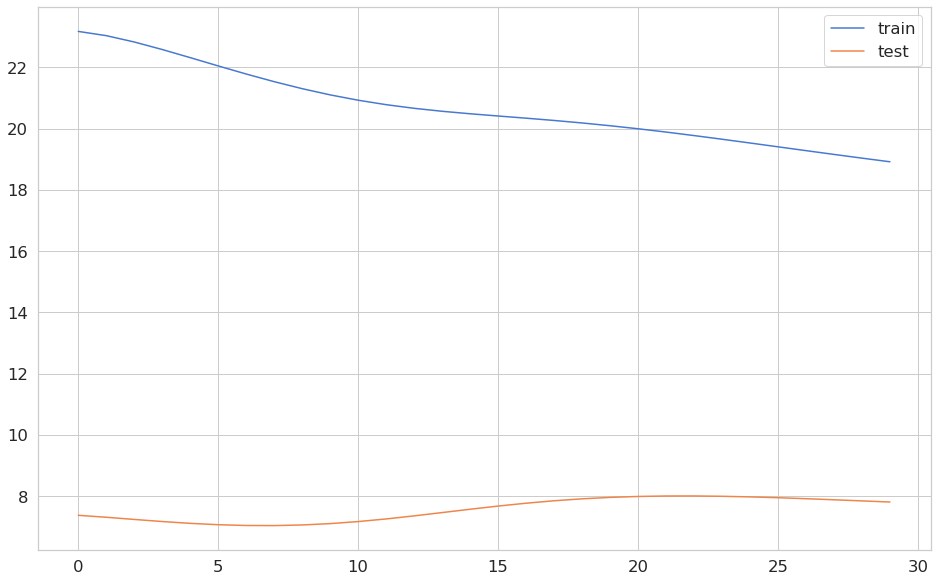

In [22]:
df_pro=pd.read_csv("df3.csv")
df_pro_kill=df_pro[['playdate','kill']]
df_pro_kill.index=df_pro_kill['playdate']
df_pro_kill=df_pro_kill.drop('playdate',axis=1)
df=df_pro_kill

train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 1

# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.kill, time_steps)
X_test, y_test = create_dataset(test, test.kill, time_steps)

print(X_train.shape, y_train.shape)

#model = keras.Sequential()
#model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(keras.layers.Dense(1))
#model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();



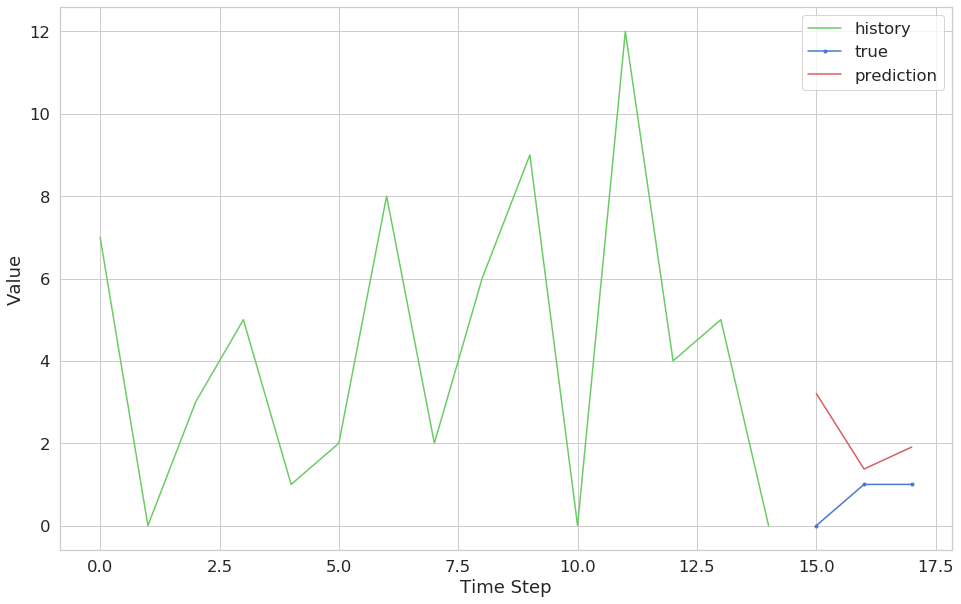

In [23]:
y_pred = model.predict(X_test)
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [24]:
pro_y_pred=y_pred

In [25]:
pro_y_test=y_test
pro_x_test=np.arange(len(y_train), len(y_train) + len(y_test))

12 3
(11, 1, 1) (11,)
Train on 9 samples, validate on 2 samples
Epoch 1/30
9/9 [==============================] - 0s 2ms/sample - loss: 39.4399 - val_loss: 12.4534
Epoch 2/30
9/9 [==============================] - 0s 2ms/sample - loss: 39.3341 - val_loss: 12.3555
Epoch 3/30
9/9 [==============================] - 0s 3ms/sample - loss: 39.1329 - val_loss: 12.2799
Epoch 4/30
9/9 [==============================] - 0s 4ms/sample - loss: 38.8651 - val_loss: 12.2294
Epoch 5/30
9/9 [==============================] - 0s 2ms/sample - loss: 38.5565 - val_loss: 12.2072
Epoch 6/30
9/9 [==============================] - 0s 3ms/sample - loss: 38.2293 - val_loss: 12.2163
Epoch 7/30
9/9 [==============================] - 0s 3ms/sample - loss: 37.9022 - val_loss: 12.2586
Epoch 8/30
9/9 [==============================] - 0s 5ms/sample - loss: 37.5907 - val_loss: 12.3342
Epoch 9/30
9/9 [==============================] - 0s 3ms/sample - loss: 37.3067 - val_loss: 12.4413
Epoch 10/30
9/9 [===================

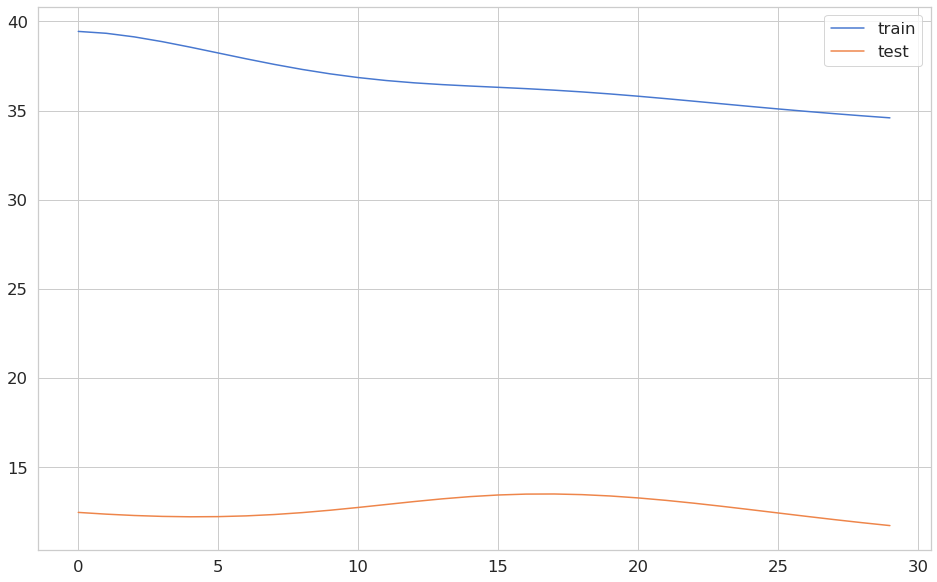

In [26]:
df_cheat=pd.read_csv("df2.csv")
df_cheat_kill=df_cheat[['playdate','kill']]
df_cheat_kill.index=df_cheat_kill['playdate']
df_cheat_kill=df_cheat_kill.drop('playdate',axis=1)
df=df_cheat_kill

train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 1

# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.kill, time_steps)
X_test, y_test = create_dataset(test, test.kill, time_steps)

print(X_train.shape, y_train.shape)

#model = keras.Sequential()
#model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(keras.layers.Dense(1))
#model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

y_pred = model.predict(X_test)


cheat_y_pred=y_pred
cheat_y_test=y_test

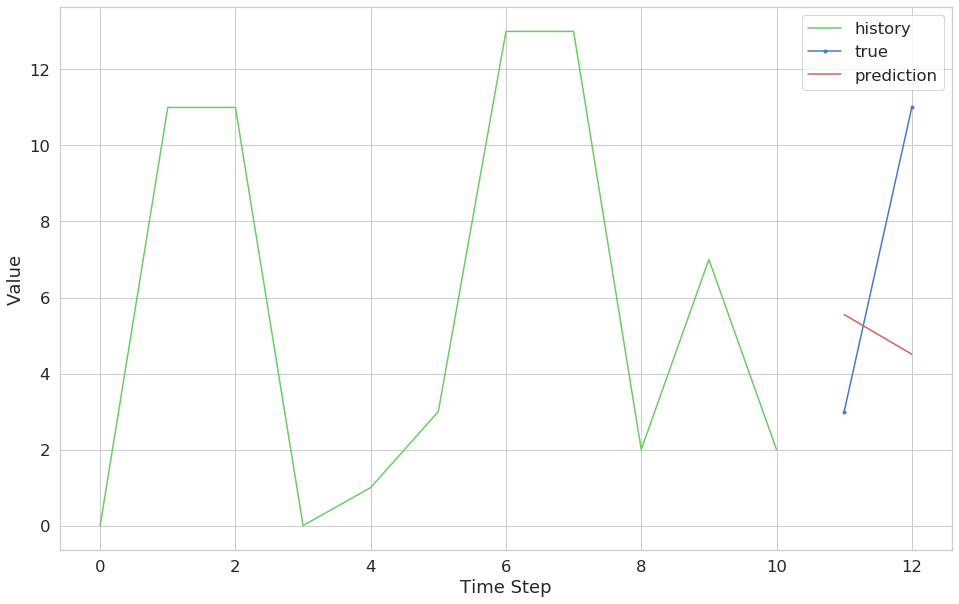

In [27]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [28]:
cheat_y_pred=y_pred
cheat_y_test=y_test
cheat_x_test=np.arange(len(y_train), len(y_train) + len(y_test))

In [29]:
cheat_y_pred

array([[5.551756 ],
       [4.5079207]], dtype=float32)

In [30]:
pro_y_pred

array([[3.2063122],
       [1.3739889],
       [1.9083834]], dtype=float32)

In [31]:
reg_y_pred

array([[0.68125933],
       [0.68125933],
       [0.68125933],
       [0.68125933],
       [0.68125933],
       [0.918925  ],
       [1.3722006 ],
       [0.68125933],
       [1.1513404 ],
       [1.3722006 ],
       [1.3722006 ],
       [0.68125933],
       [0.68125933],
       [0.68125933],
       [0.918925  ],
       [0.68125933],
       [0.68125933],
       [0.68125933],
       [0.68125933]], dtype=float32)

In [32]:
reg_x_test

array([79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
       96, 97])

In [33]:
cheat_x_test

array([11, 12])

In [34]:
pro_x_test

array([15, 16, 17])

In [35]:
reg_x_test

array([79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
       96, 97])

In [36]:
reg_y_pred

array([[0.68125933],
       [0.68125933],
       [0.68125933],
       [0.68125933],
       [0.68125933],
       [0.918925  ],
       [1.3722006 ],
       [0.68125933],
       [1.1513404 ],
       [1.3722006 ],
       [1.3722006 ],
       [0.68125933],
       [0.68125933],
       [0.68125933],
       [0.918925  ],
       [0.68125933],
       [0.68125933],
       [0.68125933],
       [0.68125933]], dtype=float32)

In [37]:
import similaritymeasures

In [38]:
np.squeeze(reg_y_pred)

array([0.68125933, 0.68125933, 0.68125933, 0.68125933, 0.68125933,
       0.918925  , 1.3722006 , 0.68125933, 1.1513404 , 1.3722006 ,
       1.3722006 , 0.68125933, 0.68125933, 0.68125933, 0.918925  ,
       0.68125933, 0.68125933, 0.68125933, 0.68125933], dtype=float32)

In [39]:
P_reg = np.array([reg_x_test, np.squeeze(reg_y_pred)]).T

In [40]:
P_cheat = np.array([cheat_x_test, np.squeeze(cheat_y_pred)]).T

In [41]:
P_pro = np.array([pro_x_test, np.squeeze(pro_y_pred)]).T

In [42]:
from scipy.spatial.distance import directed_hausdorff
dh, ind1, ind2 = directed_hausdorff(P_reg, P_cheat)

df = similaritymeasures.frechet_dist(P_reg, P_cheat)
dtw, d = similaritymeasures.dtw(P_reg, P_cheat)
pcm = similaritymeasures.pcm(P_reg, P_cheat)
area = similaritymeasures.area_between_two_curves(P_reg, P_cheat)
cl = similaritymeasures.curve_length_measure(P_reg, P_cheat)

# all methods will return 0.0 when P and Q are the same
print(dh, df, dtw, pcm, cl, area)

85.0860936788796 85.0860936788796 1446.7625213678207 68.78901771141983 8.231848672890777 187.4096377082169


In [43]:
from scipy.spatial.distance import directed_hausdorff
dh, ind1, ind2 = directed_hausdorff(P_reg, P_pro)

df = similaritymeasures.frechet_dist(P_reg, P_pro)
dtw, d = similaritymeasures.dtw(P_reg, P_pro)
pcm = similaritymeasures.pcm(P_reg, P_pro)
area = similaritymeasures.area_between_two_curves(P_reg, P_pro)
cl = similaritymeasures.curve_length_measure(P_reg, P_pro)

# all methods will return 0.0 when P and Q are the same
print(dh, df, dtw, pcm, cl, area)

80.00941090520637 80.00941090520637 1352.1920753596385 44.05548354039518 5.057249788685258 208.3627917431295


In [44]:
P_reg

array([[79.        ,  0.68125933],
       [80.        ,  0.68125933],
       [81.        ,  0.68125933],
       [82.        ,  0.68125933],
       [83.        ,  0.68125933],
       [84.        ,  0.91892499],
       [85.        ,  1.37220061],
       [86.        ,  0.68125933],
       [87.        ,  1.15134037],
       [88.        ,  1.37220061],
       [89.        ,  1.37220061],
       [90.        ,  0.68125933],
       [91.        ,  0.68125933],
       [92.        ,  0.68125933],
       [93.        ,  0.91892499],
       [94.        ,  0.68125933],
       [95.        ,  0.68125933],
       [96.        ,  0.68125933],
       [97.        ,  0.68125933]])

In [45]:
P_cheat

array([[11.        ,  5.55175591],
       [12.        ,  4.50792074]])

In [46]:
P_pro

array([[15.        ,  3.20631218],
       [16.        ,  1.37398887],
       [17.        ,  1.90838337]])

In [47]:
P_reg=np.array([[79.        ,  0.68125933],
       [80.        ,  0.68125933],
       [81.        ,  0.68125933],
       [82.        ,  0.68125933],
       [83.        ,  0.68125933],
       [84.        ,  0.91892499],
       [85.        ,  1.37220061],
       [86.        ,  0.68125933],
       [87.        ,  1.15134037],
       [88.        ,  1.37220061],
       [89.        ,  1.37220061],
       [90.        ,  0.68125933],
       [91.        ,  0.68125933],
       [92.        ,  0.68125933],
       [93.        ,  0.91892499],
       [94.        ,  0.68125933],
       [95.        ,  0.68125933],
       [96.        ,  0.68125933],
       [97.        ,  0.68125933]])

In [48]:
P_reg

array([[79.        ,  0.68125933],
       [80.        ,  0.68125933],
       [81.        ,  0.68125933],
       [82.        ,  0.68125933],
       [83.        ,  0.68125933],
       [84.        ,  0.91892499],
       [85.        ,  1.37220061],
       [86.        ,  0.68125933],
       [87.        ,  1.15134037],
       [88.        ,  1.37220061],
       [89.        ,  1.37220061],
       [90.        ,  0.68125933],
       [91.        ,  0.68125933],
       [92.        ,  0.68125933],
       [93.        ,  0.91892499],
       [94.        ,  0.68125933],
       [95.        ,  0.68125933],
       [96.        ,  0.68125933],
       [97.        ,  0.68125933]])